In [103]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [104]:
data=pd.read_csv(r"retail_store_sales_data.csv")
data.head()

,StoreID,StoreLocation,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,OperatingHours,StoreSize,ProductVariety
0,1,Urban,765951.617844,8,7509.409098,5.997531,219.688047,9-5,346.424362,100
1,2,Suburban,970260.353170,19,4177.683775,9.706365,138.874730,11-7,291.921515,137
2,3,NaN,472994.222706,47,4494.583873,8.463078,256.652304,10-6,844.609463,168
3,4,Suburban,419841.833555,26,5574.808511,8.850156,445.311051,11-7,889.861148,99
4,5,Suburban,139476.186790,41,2180.563539,NaN,440.451917,10-6,419.352320,95


In [105]:
data.describe()

,StoreID,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,StoreSize,ProductVariety
count,3123.000000,3123.000000,3123.000000,3123.000000,2811.000000,3123.000000,3123.000000,3123.000000
mean,1562.000000,541406.169895,27.233429,5447.706162,5.448179,255.853944,552.906220,110.157221
std,901.676771,256859.435331,12.802657,2614.058188,2.605302,140.034118,262.630309,52.371657
min,1.000000,100065.204675,5.000000,1001.353430,1.001863,20.079892,100.689811,20.000000
25%,781.500000,323585.138587,16.000000,3160.551229,3.191613,135.081565,321.703077,64.000000
50%,1562.000000,536587.160888,27.000000,5407.395805,5.449694,250.256408,555.616776,111.000000
75%,2342.500000,762713.480001,38.000000,7735.019665,7.736844,378.043995,785.058971,154.000000
max,3123.000000,999967.616688,49.000000,9999.801566,9.998148,499.981768,999.909758,199.000000


In [106]:
data.shape

(3123, 10)

In [107]:
data = data.drop_duplicates()
data.shape

(3123, 10)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3123 entries, 0 to 3122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StoreID                    3123 non-null   int64  
 1   StoreLocation              2811 non-null   object 
 2   AnnualSales                3123 non-null   float64
 3   NumberOfEmployees          3123 non-null   int64  
 4   MonthlyFootTraffic         3123 non-null   float64
 5   CustomerSatisfactionScore  2811 non-null   float64
 6   AverageTransactionValue    3123 non-null   float64
 7   OperatingHours             2811 non-null   object 
 8   StoreSize                  3123 non-null   float64
 9   ProductVariety             3123 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 244.1+ KB


In [109]:
#Handle missing values

In [110]:
#checking null values
data.isnull().sum()

StoreID                        0
StoreLocation                312
AnnualSales                    0
NumberOfEmployees              0
MonthlyFootTraffic             0
CustomerSatisfactionScore    312
AverageTransactionValue        0
OperatingHours               312
StoreSize                      0
ProductVariety                 0
dtype: int64

In [111]:
data['CustomerSatisfactionScore'].fillna(data['CustomerSatisfactionScore'].median(), inplace=True)
#creating a new category for a categorical columns
data['StoreLocation'].fillna('None', inplace=True)
data['OperatingHours'].fillna('None', inplace=True)


In [112]:
data.isnull().sum()

StoreID                      0
StoreLocation                0
AnnualSales                  0
NumberOfEmployees            0
MonthlyFootTraffic           0
CustomerSatisfactionScore    0
AverageTransactionValue      0
OperatingHours               0
StoreSize                    0
ProductVariety               0
dtype: int64

In [113]:
#normalize features.

In [114]:
cat_columns = ['OperatingHours','StoreLocation']
numerical_columns = ['AnnualSales','NumberOfEmployees','MonthlyFootTraffic','CustomerSatisfactionScore','AverageTransactionValue','StoreSize','ProductVariety']
others = ['StoreID']

In [115]:
data[cat_columns] = data[cat_columns].astype('category')

In [116]:
ohe_enc = OneHotEncoder(drop=None, sparse_output=False)
data_train_ohe = ohe_enc.fit_transform(data[cat_columns])
data_train_ohe = pd.DataFrame(data_train_ohe, columns=ohe_enc.get_feature_names_out(cat_columns))
cat_columns_ohe = data_train_ohe.columns

In [117]:
data[numerical_columns] = StandardScaler().fit_transform(data[numerical_columns])

In [118]:
feature_set = list(others) + list(cat_columns_ohe) + list(numerical_columns)
feature_set

['StoreID',
 'OperatingHours_10-6',
 'OperatingHours_11-7',
 'OperatingHours_9-5',
 'OperatingHours_None',
 'StoreLocation_None',
 'StoreLocation_Rural',
 'StoreLocation_Suburban',
 'StoreLocation_Urban',
 'AnnualSales',
 'NumberOfEmployees',
 'MonthlyFootTraffic',
 'CustomerSatisfactionScore',
 'AverageTransactionValue',
 'StoreSize',
 'ProductVariety']

In [119]:
df = pd.concat([data[others], data_train_ohe, data[numerical_columns]], axis=1)
df

,StoreID,OperatingHours_10-6,OperatingHours_11-7,OperatingHours_9-5,OperatingHours_None,StoreLocation_None,StoreLocation_Rural,StoreLocation_Suburban,StoreLocation_Urban,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,StoreSize,ProductVariety
0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.874336,-1.502540,0.788824,0.222232,-0.258306,-0.786333,-0.193976
1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.669874,-0.643206,-0.485921,1.722994,-0.835496,-0.993893,0.512626
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.266383,1.544190,-0.364672,1.219904,0.005702,1.110877,1.104644
3,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.473348,-0.096357,0.048630,1.376533,1.353152,1.283206,-0.213073
4,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.565036,1.075462,-1.250036,0.000552,1.318447,-0.508606,-0.289463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,3119,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.148037,0.138007,0.570996,1.802969,0.057275,1.201411,1.276520
3119,3120,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.383841,-0.330721,-0.790202,-0.355372,-1.491945,-0.374167,-1.721764
3120,3121,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.256337,0.138007,1.230650,0.708625,-1.168686,0.694386,0.149776
3121,3122,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.272811,0.059885,0.958120,-1.749731,-0.660209,-1.520955,1.696662


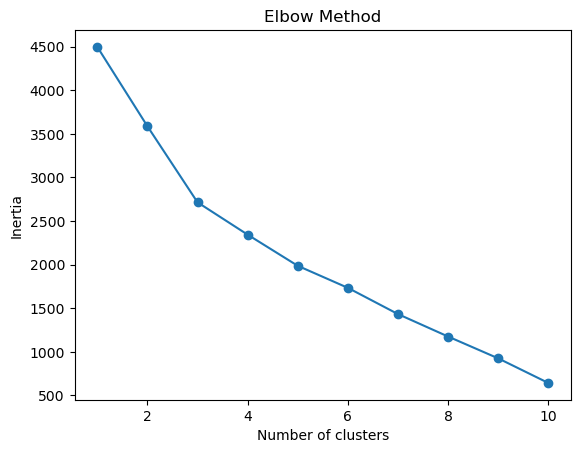

In [120]:
# Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_train_ohe, data[numerical_columns])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [121]:
# Apply K-Means with k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_train_ohe, data[numerical_columns])
# Check the cluster assignments
df['Cluster'].value_counts()
df.head(15)

,StoreID,OperatingHours_10-6,OperatingHours_11-7,OperatingHours_9-5,OperatingHours_None,StoreLocation_None,StoreLocation_Rural,StoreLocation_Suburban,StoreLocation_Urban,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,StoreSize,ProductVariety,Cluster
0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.874336,-1.502540,0.788824,0.222232,-0.258306,-0.786333,-0.193976,2
1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.669874,-0.643206,-0.485921,1.722994,-0.835496,-0.993893,0.512626,1
2,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.266383,1.544190,-0.364672,1.219904,0.005702,1.110877,1.104644,3
3,4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.473348,-0.096357,0.048630,1.376533,1.353152,1.283206,-0.213073,1
4,5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.565036,1.075462,-1.250036,0.000552,1.318447,-0.508606,-0.289463,3
5,6,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.073219,-1.346298,-0.466470,0.000552,0.613941,1.232966,1.696662,0
6,7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.887536,1.387948,1.536822,-0.562213,-0.475493,-1.286121,0.951865,2
7,8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.075672,1.700433,-1.079739,1.215649,0.970562,1.135141,-0.671410,0
8,9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.926333,-0.486964,-0.616470,-1.426157,0.967628,-0.232791,0.187971,2
9,10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.159212,-1.190055,1.078113,0.695058,1.369492,0.605711,-0.537728,2


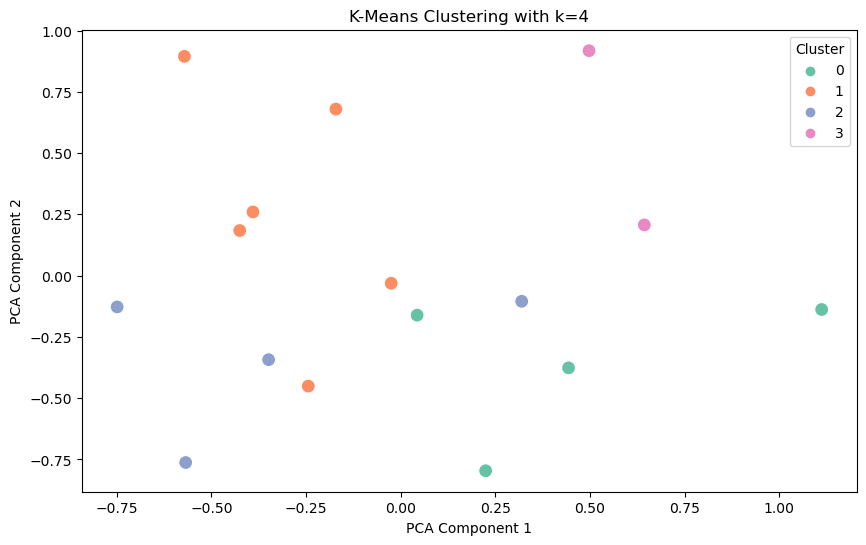

In [122]:
# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data_train_ohe, data[numerical_columns])
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=df['Cluster'], palette='Set2', s=100)
plt.title('K-Means Clustering with k=4')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [123]:
cluster_summary = df.groupby('Cluster').mean()
cluster_summary

,StoreID,OperatingHours_10-6,OperatingHours_11-7,OperatingHours_9-5,OperatingHours_None,StoreLocation_None,StoreLocation_Rural,StoreLocation_Suburban,StoreLocation_Urban,AnnualSales,NumberOfEmployees,MonthlyFootTraffic,CustomerSatisfactionScore,AverageTransactionValue,StoreSize,ProductVariety
Cluster,,,,,,,,,,,,,,,,
0,1609.721925,0.328342,0.297326,0.279144,0.095187,0.000000,1.0,0.000000,0.0,-0.037854,-0.015311,0.031949,0.008864,0.010390,0.025771,0.015176
1,1563.509781,0.000000,0.432681,0.426928,0.140391,0.249712,0.0,0.750288,0.0,0.000047,0.010172,-0.020251,-0.018014,-0.022885,-0.020183,-0.026649
2,1534.614393,0.295381,0.293233,0.302900,0.108485,0.000000,0.0,0.000000,1.0,0.024289,0.025818,0.015937,-0.000100,-0.007435,0.009095,-0.018408
3,1509.329897,1.000000,0.000000,0.000000,0.000000,0.244845,0.0,0.755155,0.0,0.032833,-0.047833,-0.069874,0.019225,0.044056,-0.038723,0.067284


In [124]:
cluster_summary = df.groupby('Cluster').agg({
    'AnnualSales': ['mean', 'std', 'median'],
    'NumberOfEmployees': ['mean', 'std', 'median'],
    'MonthlyFootTraffic': ['mean', 'std', 'median'],
    'CustomerSatisfactionScore': ['mean', 'std', 'median'],
    'AverageTransactionValue': ['mean', 'std', 'median'],
    'StoreSize': ['mean', 'std', 'median'],
    'ProductVariety': ['mean', 'std', 'median']
}).reset_index()


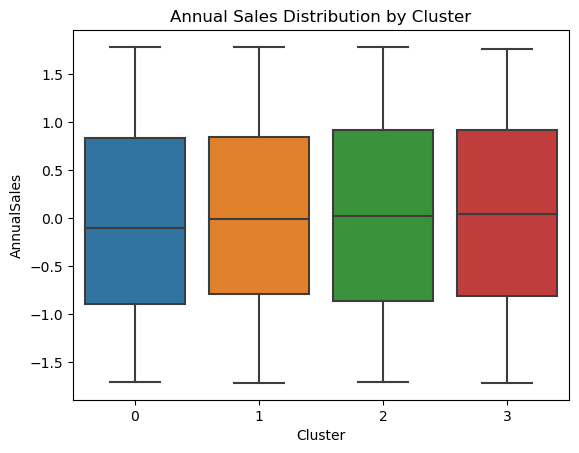

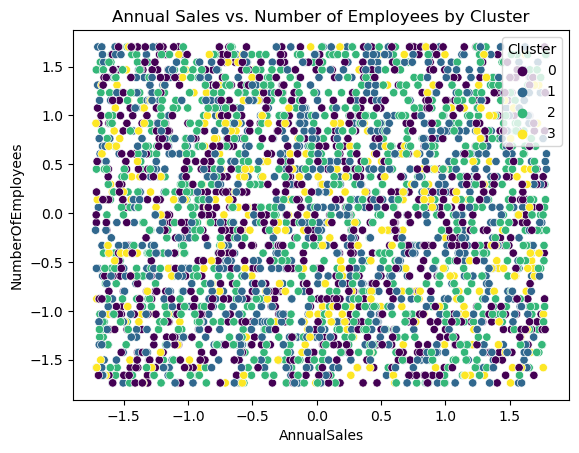

In [125]:
#Box plot for Annual Sales by Cluster
sns.boxplot(x='Cluster', y='AnnualSales', data=df)
plt.title('Annual Sales Distribution by Cluster')
plt.show()

#Scatter plot of two features colored by cluster
sns.scatterplot(x='AnnualSales', y='NumberOfEmployees', hue='Cluster', data=df, palette='viridis')
plt.title('Annual Sales vs. Number of Employees by Cluster')
plt.show()


In [126]:
print(df['Cluster'].unique())

[2 1 3 0]


In [127]:
#code to print summary for each cluster
for cluster_id in df['Cluster'].unique():
    print(f"Cluster {cluster_id}:")
    cluster_data = df[df['Cluster'] == cluster_id]
    print("Annual Sales - Mean:", cluster_data['AnnualSales'].mean())
    print("Number of Employees - Mean:", cluster_data['NumberOfEmployees'].mean())
    print("Monthly Foot Traffic - Mean:", cluster_data['MonthlyFootTraffic'].mean())
    print("Customer Satisfaction Score - Mean:", cluster_data['CustomerSatisfactionScore'].mean())
    print("Average Transaction Value - Mean:", cluster_data['AverageTransactionValue'].mean())
    print("Store Size - Mean:", cluster_data['StoreSize'].mean())
    print("Product Variety - Mean:", cluster_data['ProductVariety'].mean())
    print("\n")


Cluster 2:
Annual Sales - Mean: 0.024288850140238454
Number of Employees - Mean: 0.02581755584827083
Monthly Foot Traffic - Mean: 0.01593689645724578
Customer Satisfaction Score - Mean: -9.953903987914179e-05
Average Transaction Value - Mean: -0.007434712905397631
Store Size - Mean: 0.009094903944399893
Product Variety - Mean: -0.018407561247572084


Cluster 1:
Annual Sales - Mean: 4.726549266183712e-05
Number of Employees - Mean: 0.010171937266805797
Monthly Foot Traffic - Mean: -0.020250966235103543
Customer Satisfaction Score - Mean: -0.018013867073116537
Average Transaction Value - Mean: -0.022884577103023013
Store Size - Mean: -0.020183056624080962
Product Variety - Mean: -0.026648935686963263


Cluster 3:
Annual Sales - Mean: 0.0328327387405552
Number of Employees - Mean: -0.04783330870325277
Monthly Foot Traffic - Mean: -0.06987375062499124
Customer Satisfaction Score - Mean: 0.019224835076541928
Average Transaction Value - Mean: 0.044056195796629914
Store Size - Mean: -0.038723